In [4]:
import numpy as np
import pandas as pd
import statistics as sta
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv('LazadaProductData.csv')
df.head()

,p_brand,p_cate,p_image,p_mall,p_name,p_number_reviews,p_price,p_rate1star,p_rate2star,p_rate3star,p_rate4star,p_rate5star,p_rating,s_name,s_rating,s_response_rate,s_ship_ontime
0,Dell,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/ab973a529b50491bb63a...,Mall,Laptop Dell Inspiron 7400 14.5 inches IPS QHD ...,Không có đánh giá,31.490.000 ₫,0.0,0.0,0.0,0.0,0.0,0.0,DELL Official Retail Store,88%,100%,100%
1,HP,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/0fc9119358dc21cb9dcd...,Mall,Laptop HP ProBook 450 G8 2H0Y1PA (Core i7-1165...,Không có đánh giá,31.490.000 ₫,0.0,0.0,0.0,0.0,0.0,0.0,An Phát HP,94%,89%,100%
2,HP,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/1063855536ce9dfae5dc...,Mall,Laptop HP 14s-fq1080AU 4K0Z7PA (Ryzen 3-5300U ...,1 đánh giá,12.390.000 ₫,0.0,0.0,0.0,0.0,1.0,5.0,An Phát HP,94%,89%,100%
3,Dell,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/756f7f7aeb632324816e...,Non-Mall,"Brand New Dell Alienware M17 R4 - 17.3"" 4K UHD...",Không có đánh giá,23.000.000 ₫,0.0,0.0,0.0,0.0,0.0,0.0,GADGETSHUB PLC,NaN,66%,100%
4,OnePlus,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/ec69d1bd94b9e41f3f37...,Non-Mall,Brand New OnePlus 9 Pro - 256GB - Morning Mist...,Không có đánh giá,8.000.000 ₫,0.0,0.0,0.0,0.0,0.0,0.0,GADGETSHUB PLC,NaN,66%,100%


In [13]:
price = df["p_price"]
new_price = []
for item in price:
    item = str(item)
    if "." in item:
        item = item.replace(".","")
    if item[-1]=="₫":  
        item = item.replace("₫","")
    item = item.strip()    
    new_price.append(int(item))
df["p_price"] = new_price

In [14]:
def stat_table(a,title_plt=""):
    x = df.groupby(a)[a].count()
    dt = pd.DataFrame(x)
    dt.columns = ['quantity']
    count = []
    for i in dt['quantity']:
        x = i
        count.append(round(x))
    dt['quantity'] = count
    print(dt)
    mylabels = dt.index
    plt.figure(figsize = (10, 4))
    plt.title(title_plt, fontsize = 20, color = 'red')
    sns.barplot(count, mylabels, df = dt, orient = 'h')

In [19]:
# Filter produk beradadrkan price range
price_cate = df["p_price"]
# Klasifikasi harga produk
list_cate = ["Produk Harga 0 - 10K","Produk Harga 10K - 100K","Produk Harga 100K - 1M","Produk Harga 1M - 10M","Produk Harga Lebih Dari 10M"]
count_list_cate = [0, 0, 0, 0, 0]
count_price_cate = []
for item in price_cate:
    if item<10000:
        count_list_cate[0] = count_list_cate[0] +1
    elif item<100000:
        count_list_cate[1] = count_list_cate[1] +1
    elif item<1000000:
        count_list_cate[2] = count_list_cate[2] +1
    elif item<10000000:
        count_list_cate[3] = count_list_cate[3] +1
    else:
        count_list_cate[4] = count_list_cate[4] +1
# Calculate percent
for item in count_list_cate:
    count_price_cate.append(round(item))
    
def barplot_a(count, list_cate):
    price_df = pd.Series(count, index=list_cate)
    print(price_df)
    mylabels = price_df.index
    plt.figure(figsize = (10, 4))
    plt.title('Price ranges of products', fontsize = 20, color = 'red')
    sns.barplot(price_df, mylabels, orient = 'h')

In [20]:
def barplot_b(column,title=""):
    data_check = df[column]
    brand_list_check = []           
    quantity_list_check = []        

    for item in data_check:                                                 
        if item not in brand_list_check:                                        
            brand_list_check.append(item)                                          
            quantity_list_check.append(1)                                       
        else:                                                                   
            index = brand_list_check.index(item)                                
            quantity_list_check[index] = quantity_list_check[index]+1       

    quantity = []       
    brand = []          

    for item in range(len(quantity_list_check)):                                                                
        count = quantity_list_check[item]
        name_brand = brand_list_check[item]
        if count<15:                                     
            name_brand = "Small Brand"                            

        if name_brand not in brand:                        
            brand.append(name_brand)                               
            quantity.append(count)                             
        else:                                                  
            index = brand.index(name_brand)                     
            quantity[index] = quantity[index] + count       

    brand_df = pd.Series(quantity, index=brand) 
    brand_df = brand_df.sort_values()       
    print(brand_df)
    mylabels = brand_df.index
    plt.figure(figsize = (10, 4))
    plt.title(title, fontsize = 20, color = 'red')
    sns.barplot(brand_df, mylabels, orient = 'h')

Produk Harga 0 - 10K            147
Produk Harga 10K - 100K         658
Produk Harga 100K - 1M         1000
Produk Harga 1M - 10M           489
Produk Harga Lebih Dari 10M     196
dtype: int64


C:\Users\Iman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


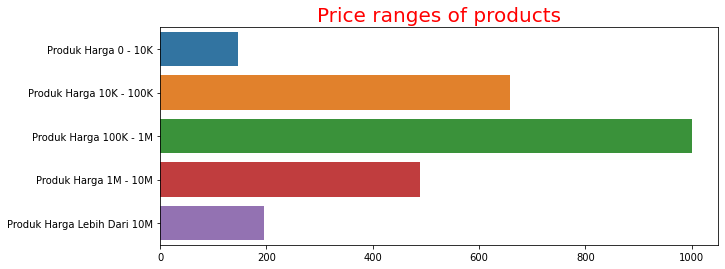

In [21]:
# barplot price range
barplot_a(count_price_cate, list_cate)

In [ ]:
# Produk dengan harga 100K - 1M lebih dominan dari yang lain

Total Brands: 2490
MAC              15
Epson            16
TP-Link          17
amazfit          19
GoPro            22
Microsoft        22
IMOU             32
Apple            34
Xiaomi           39
Samsung          40
HP               48
yoosee           65
Ezviz            81
Dell            107
Small Brand     425
OEM             426
No Brand       1082
dtype: int64


C:\Users\Iman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


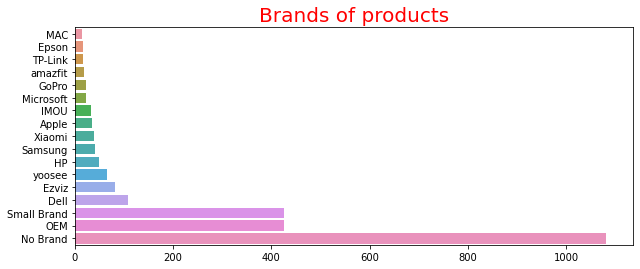

In [22]:
total_brand = df["p_brand"]
print(f"Total Brands: {len(total_brand)}")
barplot_b('p_brand',"Brands of products")

In [ ]:
# Brand yang dominan adalah tanpa brand